# ECE 6254 - Statistical Machine Learning
## Project - Loonie
### Oversampling

#### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import statistics
from matplotlib.transforms import Bbox

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, roc_curve
from tqdm import tqdm

import imblearn

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

## To install the library (at least for Linux):
# git clone https://github.com/scikit-learn-contrib/imbalanced-learn.git
# cd imbalanced-learn
# pip install .

#### Function Definition

In [2]:
def plot_histogram(x_mi, x_ma, undersampled=False):
    if undersampled:
         plt.hist(x_ma, bins=25, alpha=0.6, color='r', label='Majority Class Undersampled')
    else:
        plt.hist(x_ma, bins=25, alpha=0.6, color='r', label='Majority Class')
    plt.hist(x_mi, bins=25, alpha=0.6, color='b', label='Minority Class')

    plt.grid(True,which='major',linewidth=0.5)
    plt.grid(True,which='minor',linewidth=0.1)
    plt.xlabel("$x$")
    plt.ylabel("Count")
    plt.legend(loc='upper left',fontsize='small')

In [3]:
def oversampling(x_mi,x_ma,ratio):
    dataset_majority = np.c_[x_ma, np.zeros(np.shape(x_ma)[0])]
    dataset_minority = np.c_[x_mi, np.ones(np.shape(x_mi)[0])]

    dataset = np.concatenate((dataset_majority, dataset_minority))

    X = dataset[:,0]
    y = dataset[:,1]

    over = SMOTE(sampling_strategy=ratio)
    steps = [('o', over)]
    pipeline = Pipeline(steps=steps)
    # transform the dataset
    X_over, y_over = pipeline.fit_resample(X.reshape(-1, 1), y)

    X_over_majority = X_over[y_over < 1]
    y_over_majority = y_over[y_over < 1]

    X_over_minority = X_over[y_over > 0]
    y_over_minority = y_over[y_over > 0]
    
    return X_over_minority


In [4]:
def oversampling2D(x_mi,x_ma,ratio):
    dataset_majority = np.c_[x_ma, np.zeros(np.shape(x_ma)[0])]
    dataset_minority = np.c_[x_mi, np.ones(np.shape(x_mi)[0])]

    dataset = np.concatenate((dataset_majority, dataset_minority))

    X = dataset[:,0:2]
    y = dataset[:,2]

    over = SMOTE(sampling_strategy=ratio)
    steps = [('o', over)]
    pipeline = Pipeline(steps=steps)
    # transform the dataset
    X_over, y_over = pipeline.fit_resample(X, y)

    X_over_majority = X_over[y_over < 1]
    y_over_majority = y_over[y_over < 1]

    X_over_minority = X_over[y_over > 0]
    y_over_minority = y_over[y_over > 0]
    
    return X_over_minority

In [5]:
def full_extent(ax, pad=0.0):
    """Get the full extent of an axes, including axes labels, tick labels, and
    titles."""
    # For text objects, we need to draw the figure first, otherwise the extents
    # are undefined.
    ax.figure.canvas.draw()
    items = ax.get_xticklabels() + ax.get_yticklabels() 
    #items += [ax, ax.title, ax.xaxis.label, ax.yaxis.label]
    #items += [ax, ax.title]
    items += [ax.get_xaxis().get_label(), ax.get_yaxis().get_label()]
    bbox = Bbox.union([item.get_window_extent() for item in items])

    return bbox.expanded(0.98 + pad, 0.93 + pad)

In [6]:
def posterior_bias(x_mi, x_ma, pi_mi, Ratio_opt, graph_name, range_min=-15, range_max=15):
    fig = plt.figure(figsize=(7,10))
    ax1 = fig.add_subplot(2,1,1) #First subplot -> Histogram of growing \Beta
    ax2 = fig.add_subplot(2,1,2) #Second subplot -> Bias in probability
    n_ma, bin_ma, bars = ax1.hist(x_ma, bins=range(range_min, range_max, 1), alpha=0.4, color='r', label='Majority Class')
    
    for ii in range(0, len(Ratio_opt)):
        
     
        x_mi_oversampled = oversampling(x_mi,x_ma,Ratio_opt[ii])
        
        n_mi, bin_mi, bars = ax1.hist(x_mi_oversampled, bins=range(range_min, range_max, 1), alpha=0.3, color='b',
                                      label=['Minority Class Oversampled with R='+str(Ratio_opt[ii])])
        ind=np.where((n_mi+n_ma)>0)
        p_us_mi= n_mi[ind]/(n_mi[ind]+n_ma[ind])
        ax2.plot(bin_ma[ind]+0.5, p_us_mi,  'o-', label=r'ratio = '+str(Ratio_opt[ii])) #alpha=0.3,

    plt.xlabel("$x$")
    plt.ylabel("$p$")
    plt.grid(True,which='major',linewidth=0.5)
    plt.grid(True,which='minor',linewidth=0.1)
    plt.legend(loc='lower left',fontsize='small')
    plt.xlim([range_min+5,range_max-5])
    ax1.set_ylabel('Count')
    ax1.set_xlabel('$x$')
    ax1.grid()
    
    #Save the figure of the posterior bias only
    # Save just the portion _inside_ the second axis's boundaries
    extent = full_extent(ax2).transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(graph_name, bbox_inches=extent)

# Let's start simple in 1 Dimension


In [7]:
pi_mi = 0.3    # Proportion of minority class
N = 1e7       # Total number of samples
mu_mi = 0
sigma_mi = 3
mu_ma = 3
sigma_ma = 3

In [8]:
# Samples of minority class
x_mi = np.random.normal(loc=mu_mi, scale=sigma_mi, size=(int(pi_mi*N), 1))
# Samples of majority class
x_ma = np.random.normal(loc=mu_ma, scale=sigma_ma, size=(int((1-pi_mi)*N), 1))

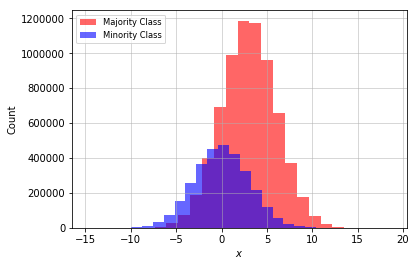

In [9]:
plot_histogram(x_mi, x_ma)

In [10]:
ratio = 0.8

X_over_minority = oversampling(x_mi,x_ma,ratio)

print("Ratio Minority/Majority = "+str(float(np.shape(X_over_minority)[0]/np.shape(x_ma)[0])))

Ratio Minority/Majority = 0.8


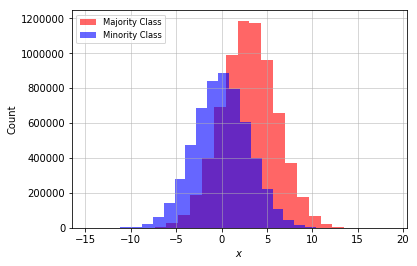

In [11]:
plot_histogram(X_over_minority, x_ma)

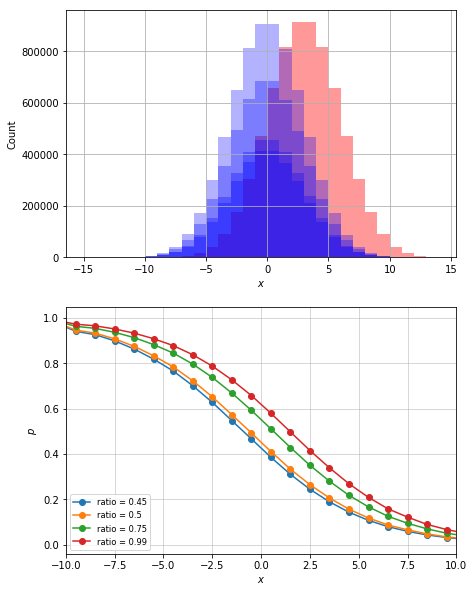

In [17]:
Ratio_opt = [0.45, 0.5, 0.75, 0.99] # Probability of selecting a sample from the majority class
graph_name = 'posterior_bias_oversampling.png'
posterior_bias(x_mi, x_ma, pi_mi, Ratio_opt, graph_name)

# Impact on Classification

To evaluate the perfomance of this technique, we consider multiple oversampling ratios, and KNN and Naive Bayes models for classification. 

#### Generate Training Dataset

In [18]:
pi_mi = 0.3    # Proportion of minority class
N = 100         # Total number of samples
mu_mi = [-1,-0.5]
sigma_mi = [[1,0],[0,1]]
mu_ma = [0,1]
sigma_ma = [[4,0],[0,2]]

In [19]:
N=1e6
x2D_ma = np.random.multivariate_normal(mu_ma,sigma_ma,int((1-pi_mi)*N))
x2D_mi = np.random.multivariate_normal(mu_mi,sigma_mi,int(pi_mi*N))

#### KNN Classification without undersampling

In [20]:
y_training = np.r_[[1]*len(x2D_ma), [-1]*len(x2D_mi)]
x_training = np.r_[x2D_ma,x2D_mi]
KKNClassifier = KNeighborsClassifier(n_neighbors=3).fit(x_training,y_training)
NBClassifier = GaussianNB().fit(x_training,y_training)

#### Prediction and Classification Evaluation

In [21]:
N_test=1e3
x2D_ma_test = np.random.multivariate_normal(mu_ma,sigma_ma,int((1-pi_mi)*N_test))
x2D_mi_test = np.random.multivariate_normal(mu_mi,sigma_mi,int(pi_mi*N_test))

x_test = np.r_[x2D_ma_test,x2D_mi_test]
y_test = np.r_[[1]*len(x2D_ma_test), [-1]*len(x2D_mi_test)]

y_pred = KKNClassifier.predict(x_test)
y_pred_bayes_base = NBClassifier.predict(x_test)
f1_base_knn = f1_score(y_test, y_pred, average='weighted')
f1_base_bayes = f1_score(y_test, y_pred_bayes_base, average='weighted')
print("F1 Score KNN: " + str(f1_base_knn))
print("F1 Score Bayes: " + str(f1_base_bayes))

0.7628368794326241


#### Prediction F1-scores using different values of oversampling ratios

In [28]:
ratios = [i for i in list(np.linspace(0.45,1,22))]
f1scores_knn = []
f1scores_bayes = []
homog_it = 10

for ratio in tqdm(ratios):
    aux_f1_k = np.zeros([1,homog_it])
    aux_f1_b = np.zeros([1,homog_it])
    
    for i in range(homog_it): # Homogenize results
        # Update x2D_ma
        x2D_mi_oversampled = oversampling2D(x2D_mi,x2D_ma,ratio)
        x_training = np.r_[x2D_ma,x2D_mi_oversampled]
        y_training = np.r_[[1]*len(x2D_ma), [-1]*len(x2D_mi_oversampled)]

        # Create classifier
        KKNClassifier = KNeighborsClassifier(n_neighbors=3).fit(x_training,y_training)
        NBClassifier = GaussianNB().fit(x_training,y_training)
        
        y_pred_knn = KKNClassifier.predict(x_test)
        y_pred_bayes = NBClassifier.predict(x_test)
        
        aux_f1_k[0,i] = f1_score(y_test, y_pred_knn, average='weighted')
        aux_f1_b[0,i] = f1_score(y_test, y_pred_bayes, average='weighted')
        
    f1scores_knn.append(np.mean(aux_f1_k))
    f1scores_bayes.append(np.mean(aux_f1_b))

100%|██████████| 22/22 [15:43<00:00, 45.82s/it]


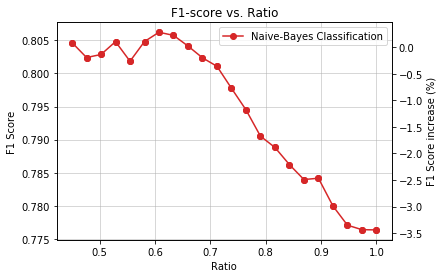

[0.8046682474711613, 0.8024177823995841, 0.8028737569915616, 0.8048190851385841, 0.8018519712100115, 0.8048372541829949, 0.8062400865756667, 0.8057662694558289, 0.8041554783651661, 0.8023708261115411, 0.8010869146845054, 0.7977636862730417, 0.7945044593496549, 0.7905198078484112, 0.7888122772169466, 0.7862113144401972, 0.7839543695356116, 0.7841637673186999, 0.7799641769542695, 0.7770584585894855, 0.7763771171691299, 0.7763396336243427]
[0.45, 0.4761904761904762, 0.5023809523809524, 0.5285714285714286, 0.5547619047619048, 0.580952380952381, 0.6071428571428572, 0.6333333333333333, 0.6595238095238095, 0.6857142857142857, 0.7119047619047619, 0.7380952380952381, 0.7642857142857142, 0.7904761904761906, 0.8166666666666667, 0.8428571428571429, 0.8690476190476191, 0.8952380952380953, 0.9214285714285715, 0.9476190476190476, 0.9738095238095239, 1.0]


In [29]:
# Plot results
plt.close()
fig = plt.figure()

ax1 = plt.subplot(111)
plt.grid(True,which='major',linewidth=0.5)
plt.grid(True,which='minor',linewidth=0.1)
#plt.plot(ratios,f1scores_knn,'-o',color='tab:blue',label='KKN Classification')
plt.plot(ratios,f1scores_bayes,'-o',color='tab:red',label='Naive-Bayes Classification')
ax1.set(title='F1-score vs. Ratio', xlabel = 'Ratio', ylabel = 'F1 Score')
plt.legend(loc='lower right')
plt.legend()

ax2 = ax1.twinx()
#plt.plot(ratios,(f1scores_knn-f1_base_knn)/f1_base_knn*100,'o',color='tab:blue')
plt.plot(ratios,(f1scores_bayes-f1_base_bayes)/f1_base_bayes*100,'o',color='tab:red')
ax2.set_ylabel('F1 Score increase (%)')
plt.show()
print(f1scores_bayes)
print(ratios)

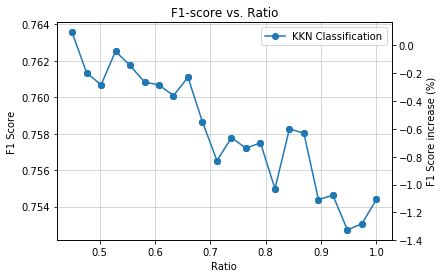

[0.8046682474711613, 0.8024177823995841, 0.8028737569915616, 0.8048190851385841, 0.8018519712100115, 0.8048372541829949, 0.8062400865756667, 0.8057662694558289, 0.8041554783651661, 0.8023708261115411, 0.8010869146845054, 0.7977636862730417, 0.7945044593496549, 0.7905198078484112, 0.7888122772169466, 0.7862113144401972, 0.7839543695356116, 0.7841637673186999, 0.7799641769542695, 0.7770584585894855, 0.7763771171691299, 0.7763396336243427]
[0.45, 0.4761904761904762, 0.5023809523809524, 0.5285714285714286, 0.5547619047619048, 0.580952380952381, 0.6071428571428572, 0.6333333333333333, 0.6595238095238095, 0.6857142857142857, 0.7119047619047619, 0.7380952380952381, 0.7642857142857142, 0.7904761904761906, 0.8166666666666667, 0.8428571428571429, 0.8690476190476191, 0.8952380952380953, 0.9214285714285715, 0.9476190476190476, 0.9738095238095239, 1.0]


In [30]:
# Plot results
plt.close()
fig = plt.figure()

ax1 = plt.subplot(111)
plt.grid(True,which='major',linewidth=0.5)
plt.grid(True,which='minor',linewidth=0.1)
plt.plot(ratios,f1scores_knn,'-o',color='tab:blue',label='KKN Classification')
ax1.set(title='F1-score vs. Ratio', xlabel = 'Ratio', ylabel = 'F1 Score')
plt.legend(loc='lower right')
plt.legend()

ax2 = ax1.twinx()
plt.plot(ratios,(f1scores_knn-f1_base_knn)/f1_base_knn*100,'o',color='tab:blue')
ax2.set_ylabel('F1 Score increase (%)')
plt.show()
print(f1scores_bayes)
print(ratios)

In [ ]:
# For Bayes Classifier, approximately the best ratio is 0.6 

ratio_opt = 0.6
x2D_mi_oversampled = oversampling2D(x2D_mi,x2D_ma,ratio_opt)

x_training = np.r_[x2D_ma,x2D_mi_oversampled]
y_training = np.r_[[1]*len(x2D_ma), [-1]*len(x2D_mi_oversampled)]

# Create classifier
NBClassifier = GaussianNB().fit(x_training,y_training)

y_pred_bayes_oversampling = NBClassifier.predict(x_test)


In [ ]:
# Plot ROC curves
a, b, _ = roc_curve(y_test, y_pred_bayes_base)
c, d, _ = roc_curve(y_test, y_pred_bayes_oversampling)

plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(a, b, label = 'Without Oversampling')
plt.plot(c, d, label='Using Oversampling')
plt.grid(True,which='major',linewidth=0.5)
plt.grid(True,which='minor',linewidth=0.1)
plt.title('ROC Curves')
plt.legend()
plt.show()